Nama : Rika Ajeng Finatih

NIM : 121450036

Kelas : Pengenalan Pola RA

# **Speech Recongnition**

Speech Recognition atau pengenalan ucapan adalah teknologi yang memungkinkan komputer atau perangkat untuk mengenali dan memahami ucapan manusia dalam bentuk suara. Tujuannya adalah untuk mengubah suara yang diucapkan menjadi teks atau tindakan yang diinginkan, sehingga mesin dapat merespons atau berinteraksi dengan pengguna melalui bahasa alami.

# **Teknik-Teknik Ekstraksi Fitur**
1. Transformasi Wavelet
2. Transformasi Fourier
3. Linear Prediction Coding
4. Mel-Frequency Cepstral Coefficient
5. Dynamic Time Warping

# **Transformasi Fourier**

Transformasi Fourier memecah sinyal dalam domain waktu menjadi representasi frekuensi. Inversinya mengembalikan sinyal dari domain frekuensi ke domain waktu:

* **Fourier Transform (FT)**: $$
x[n] = \sum_{k=0}^{N-1} X[k] \cdot e^{j \cdot 2\pi \cdot \frac{k \cdot n}{N}}
$$

* **Inverse Fourier Transform (IFT)**: $$
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] \cdot e^{j \cdot 2\pi \cdot \frac{k \cdot n}{N}}
$$



## **Langkah 1**: Instalasi dan Persiapan Library

Sebelum memulai, pastikan pustaka yang diperlukan telah diinstal. Jika belum, gunakan perintah:

In [16]:
# pip install scipy numpy matplotlib

Library yang digunakan:
1. `scipy`: Untuk membaca file `.wav`.
2. `numpy`: Untuk melakukan perhitungan numerik.
3. `matplotlib`: Untuk memvisualisasikan sinyal.

## **Langkah 2**: Membaca File `.wav`

1. File suara dalam format `.wav` berisi data digital yang merepresentasikan amplitudo sinyal suara pada titik waktu tertentu.
2. Gunakan fungsi `scipy.io.wavfile.read()` untuk membaca file `.wav`. Fungsi ini mengembalikan:
* `sample_rate`: Kecepatan sampel (contoh: 44,100 Hz).
* `data`: Data amplitudo sinyal dalam bentuk array.

In [31]:
from scipy.io import wavfile
import IPython.display as ipd

# Membaca file WAV
filename = "/content/sample-3s.wav"
sample_rate, data = wavfile.read(filename)
ipd.Audio(filename) # Menyisipkan file audio untuk diputar

In [32]:
# Jika data dalam format stereo, ambil hanya satu channel
if data.ndim > 1:
    data = data[:, 0]

print(f"Sample Rate: {sample_rate} Hz")
print(f"Total Samples: {len(data)}")

Sample Rate: 44100 Hz
Total Samples: 140928


## **Langkah 3**: Fourier Transform Manual



Kita menerapkan transformasi Fourier secara manual untuk data suara. Langkah detailnya:
1. Loop untuk setiap frekuensi
𝑘, hitung kontribusi dari semua sampel waktu
𝑛.
2. Kalikan setiap amplitudo dengan eksponensial kompleks:
$ e^{j \cdot 2\pi \cdot \frac{k \cdot n}{N}}$

3. Simpan hasil sebagai array representasi domain frekuensi.

In [33]:
import numpy as np

# Fourier Transform manual
def fourier_transform_manual(signal):
    N = len(signal)
    transformed = []
    for k in range(N):
        value = sum(signal[n] * np.exp(-2j * np.pi * k * n / N) for n in range(N))
        transformed.append(value)
    return np.array(transformed)


## **Langkah 4**: Inverse Fourier Transform Manual

1. Proses ini kebalikan dari FT.
2. Hitung kontribusi dari setiap frekuensi
𝑘 untuk setiap sampel waktu
𝑛.
3. Kalikan setiap elemen domain frekuensi dengan  $e^{j \cdot 2\pi \cdot \frac{k \cdot n}{N}}$

4. Bagi hasil dengan jumlah total sampel
𝑁

In [19]:
# Inverse Fourier Transform manual
def inverse_fourier_transform_manual(transformed):
    N = len(transformed)
    signal = []
    for n in range(N):
        value = sum(transformed[k] * np.exp(2j * np.pi * k * n / N) for k in range(N)) / N
        signal.append(value)
    return np.array(signal)


## **Langkah 5**: Fourier Transform dan IFT dengan Library Bawaan

Gunakan `numpy.fft` untuk FT dan IFT, yang jauh lebih cepat dibandingkan metode manual karena menggunakan algoritma FFT $(
𝑂
(
𝑁
log
⁡
𝑁
))$

In [20]:
# Fourier Transform menggunakan fungsi bawaan
ft_builtin = np.fft.fft(data[:1024])  # Ambil subset 1024 sampel pertama
ift_builtin = np.fft.ifft(ft_builtin)


## **Langkah 6**: Visualisasi Hasil

Untuk memahami perbedaan domain waktu dan frekuensi, serta memverifikasi bahwa FT dan IFT bekerja, kita bisa memplot sinyal asli, FT, dan IFT.

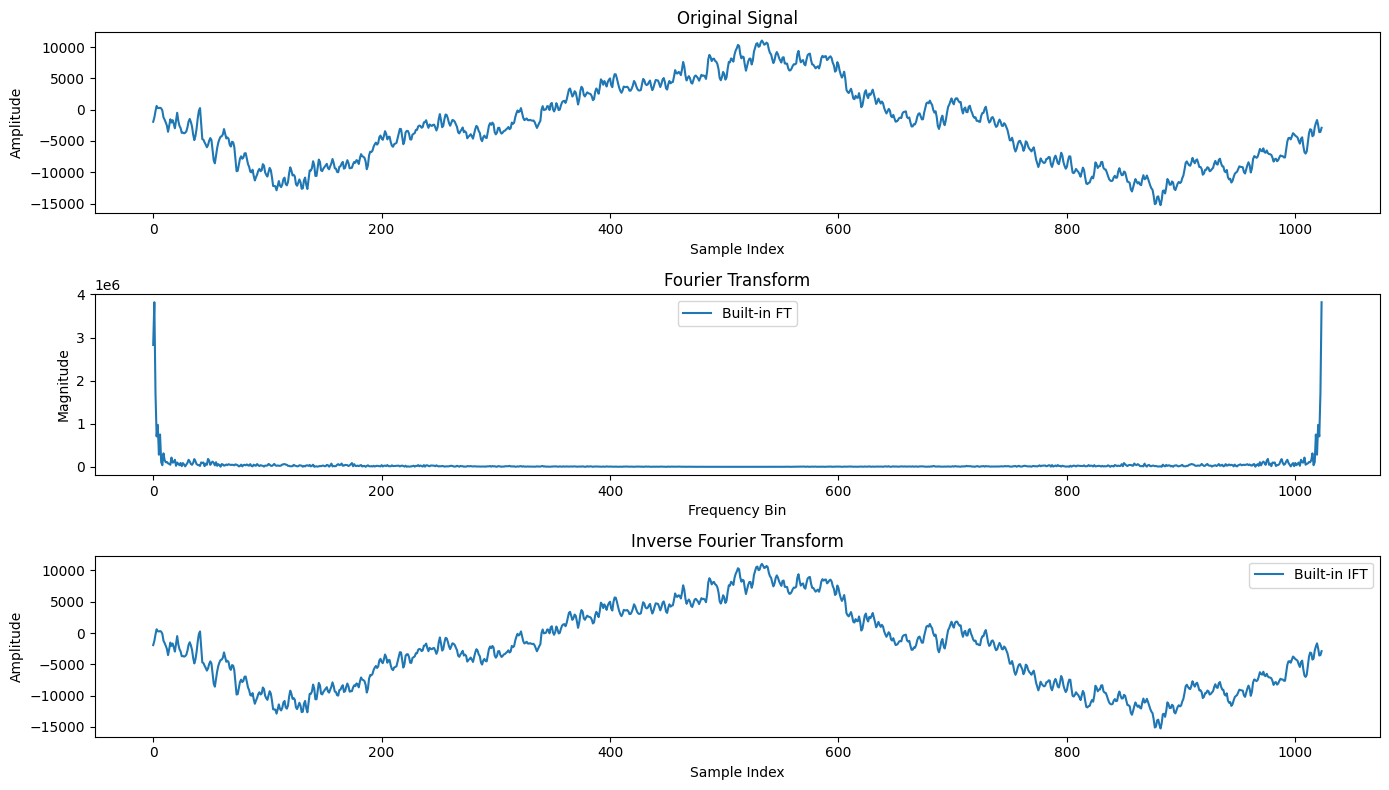

In [21]:
import matplotlib.pyplot as plt

# Plot hasil
plt.figure(figsize=(14, 8))

# Plot sinyal asli
plt.subplot(3, 1, 1)
plt.plot(data[:1024])
plt.title("Original Signal")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

# Plot Fourier Transform
plt.subplot(3, 1, 2)
plt.plot(np.abs(ft_builtin), label="Built-in FT")
plt.title("Fourier Transform")
plt.xlabel("Frequency Bin")
plt.ylabel("Magnitude")
plt.legend()

# Plot Inverse Fourier Transform
plt.subplot(3, 1, 3)
plt.plot(np.real(ift_builtin), label="Built-in IFT")
plt.title("Inverse Fourier Transform")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()


Perbandingan antara metode manual dan fungsi bawaan pada Fourier Transform (FT) dan Inverse Fourier Transform (IFT) memberikan beberapa poin analisis yang penting. Dalam domain waktu, sinyal hasil rekonstruksi dari kedua metode menunjukkan kesamaan yang tinggi dengan sinyal asli. Metode manual mampu menghasilkan sinyal yang hampir identik, meskipun mungkin terdapat perbedaan kecil akibat presisi numerik. Sementara itu, fungsi bawaan menggunakan algoritma yang telah dioptimalkan, seperti Fast Fourier Transform (FFT), sehingga hasilnya sangat akurat dan hampir selalu identik dengan sinyal asli.

Dari segi efisiensi, metode manual jauh lebih lambat karena kompleksitas komputasinya adalah
$O(N^2)$
, yang berarti waktu eksekusi meningkat drastis seiring bertambahnya jumlah sampel. Sebaliknya, fungsi bawaan dengan kompleksitas
$𝑂
(
𝑁
log
⁡
𝑁
)$ jauh lebih cepat, membuatnya ideal untuk sinyal berukuran besar atau aplikasi real-time. Dalam hal kemudahan implementasi, metode manual memerlukan lebih banyak usaha dan kode tambahan untuk menghitung FT dan IFT, sedangkan fungsi bawaan seperti `numpy.fft` di Python menyediakan solusi yang sangat mudah dan efisien.

Kesimpulannya, metode manual cocok untuk memahami konsep dasar Fourier Transform dan penerapannya pada sinyal kecil. Namun, untuk aplikasi praktis yang membutuhkan akurasi tinggi dan efisiensi, fungsi bawaan adalah pilihan terbaik. Fungsi bawaan juga memberikan hasil yang lebih stabil dan konsisten, terutama untuk data dengan ukuran besar atau kompleksitas tinggi.

# **Transformasi Wavelet**

Transformasi wavelet adalah teknik matematis yang digunakan untuk memecah data atau sinyal menjadi berbagai skala atau frekuensi. Tujuan utamanya adalah untuk menganalisis sinyal pada berbagai tingkat resolusi atau skala, yang dapat mengungkapkan detail yang mungkin tidak terlihat dalam analisis sinyal langsung. Transformasi ini sangat berguna dalam aplikasi seperti deteksi sinyal, pengolahan gambar, dan analisis data berbasis waktu, seperti data kejahatan yang Anda analisis.


## **Prinsip Dasar Transformasi Wavelet**

Wavelet bekerja dengan mengubah data ke dalam komponen-komponen frekuensi rendah (aproksimasi) dan frekuensi tinggi (detail). Dalam hal ini, proses transformasi wavelet mengkombinasikan dua tahap dasar:

1. **Dekonstruksi**: Menyaring sinyal ke dalam dua bagian, yaitu komponen frekuensi rendah dan frekuensi tinggi.

2. **Rekonstruksi**: Menggabungkan kembali komponen frekuensi rendah dan tinggi untuk memperoleh sinyal yang terdekomposisi.

Sinyal asli akan diproses dalam beberapa tingkat (atau level) untuk mendapatkan hasil yang lebih halus pada level yang lebih tinggi.

## **Jenis-Jenis Transformasi Wavelet**

Ada banyak jenis wavelet, tetapi yang paling umum digunakan adalah:

1. **Haar Wavelet**: Salah satu wavelet yang paling sederhana dan mudah dipahami, sering digunakan untuk ilustrasi.

2. **Daubechies Wavelet**: Lebih halus dan sering digunakan dalam aplikasi pemrosesan sinyal yang lebih kompleks.

3. **Symlet Wavelet**: Versi yang lebih simetris dari Daubechies.

4. **Coiflet Wavelet**: Wavelet dengan simetri yang lebih baik dan lebih halus.

5. **Wavelet Morlet**: Digunakan terutama untuk analisis frekuensi tinggi dan sinyal dengan komponen yang sangat spesifik.

## **Langkah 1**:  Install pustaka yang diperlukan

In [55]:
#pip install librosa pywt numpy matplotlib

## **Langkah 2** : Load Data Audio

Sebelum melakukan transformasi wavelet, sebelumnya harus mengimpor dan memproses data suara. Dalam pengolahan data suara digunakan pustaka librosa untuk memuat file audio dan mengonversinya menjadi sinyal satu dimensi.

In [53]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Memuat data suara
file_path = '/content/sample-3s.wav'
signal, sr = librosa.load(file_path, sr=None)  # sr=None untuk mempertahankan sample rate asli

In [54]:
signal, sr

(array([-0.059021  , -0.03894043, -0.00735474, ...,  0.0133667 ,
         0.01809692,  0.00268555], dtype=float32),
 44100)

## **Langkah 3**: Transformasi Wavelet Manual

Pada implementasi manual, kita membagi sinyal menjadi pasangan berturut-turut dan menghitung koefisien low-pass (aproksimasi) dan high-pass (detail) berdasarkan rumus wavelet Haar:

* **Low-pass** : $\frac{x_i + x_{i+1}}{2}$
* **High-pass** : $\frac{x_i - x_{i+1}}{2}$

Kemudian, divisualisasikan sinyal asli, koefisien loww-pass, dan high-pass.


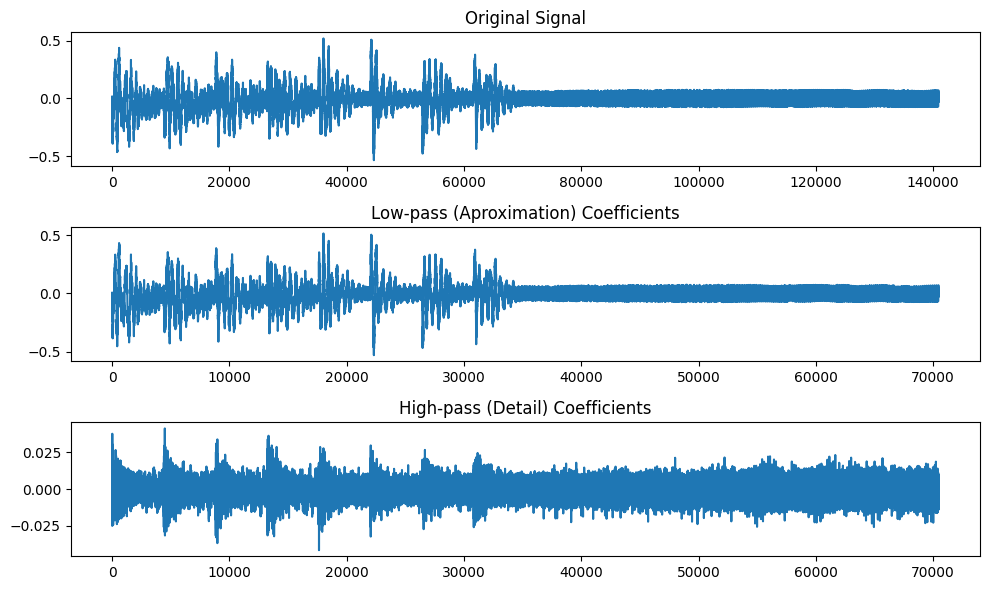

In [51]:
# Fungsi untuk menghitung koefisien low-pass dan high-pass pada wavelet Haar
def wavelet_transform(signal):
    # Melakukan dekomposisi untuk sinyal 1D
    low_pass_coeff = []
    high_pass_coeff = []

    # Melakukan dekomposisi pada setiap pasangan nilai
    for i in range(0, len(signal) - 1, 2):
        low_pass_coeff.append((signal[i] + signal[i + 1]) / 2)  # Koefisien Low-pass
        high_pass_coeff.append((signal[i] - signal[i + 1]) / 2)  # Koefisien High-pass

    # Mengembalikan hasil koefisien low-pass dan high-pass
    return np.array(low_pass_coeff), np.array(high_pass_coeff)

# Melakukan transformasi wavelet
low_pass, high_pass = wavelet_transform(signal)

# Menampilkan hasil
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(signal)
plt.title("Original Signal")
plt.subplot(3, 1, 2)
plt.plot(low_pass)
plt.title("Low-pass (Aproximation) Coefficients")
plt.subplot(3, 1, 3)
plt.plot(high_pass)
plt.title("High-pass (Detail) Coefficients")
plt.tight_layout()
plt.show()

## **Langkah 4**: Transformasi Wavelet dengan Library

Selanjutnya, kita menggunakan `PyWavelets` untuk melakukan transformasi wavelet pada data suara. `PyWavelets` adalah pustaka Python yang menyediakan berbagai jenis wavelet untuk analisis sinyal.

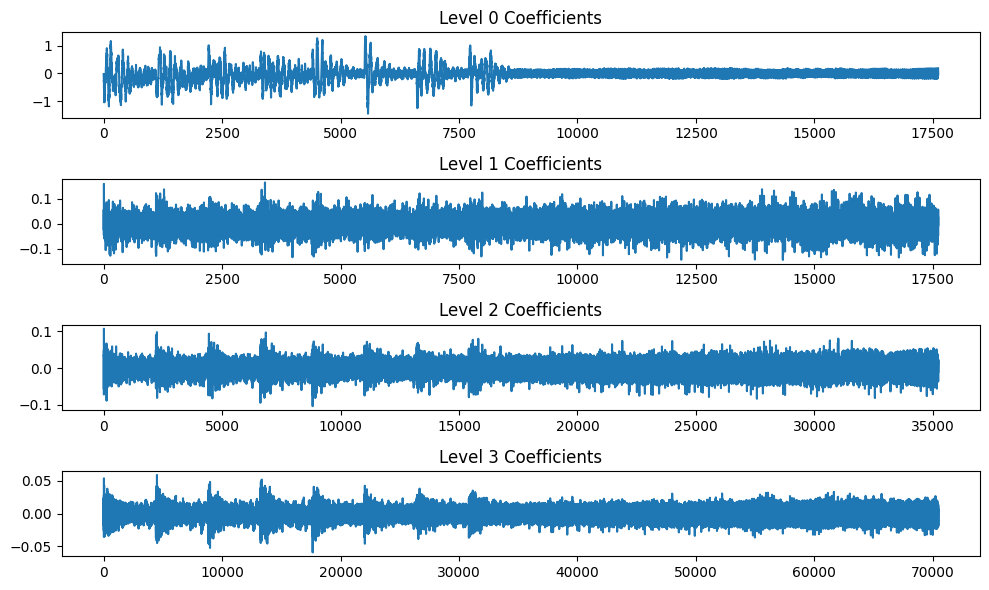

In [52]:
import pywt

# Melakukan transformasi wavelet menggunakan PyWavelets (Haar Wavelet)
coeffs = pywt.wavedec(signal, 'haar', level=3)  # Level 3 untuk dekomposisi 3 level

# Menampilkan hasil transformasi
fig, axes = plt.subplots(len(coeffs), 1, figsize=(10, 6))

for i, coeff in enumerate(coeffs):
    axes[i].plot(coeff)
    axes[i].set_title(f'Level {i} Coefficients')

plt.tight_layout()
plt.show()


Pada implementasi ini, digunakan fungsi `pywt.wavedec()` untuk melakukan dekomposisi wavelet. Fungsi ini menerima sinyal, jenis wavelet (dalam hal ini 'haar'), dan level dekomposisi yang diinginkan. `coeffs` mengembalikan koefisien pada setiap level dekomposisi, termasuk koefisien aproksimasi (low-pass) dan detail (high-pass) untuk setiap level.Kemudian, kita visualisasikan setiap koefisien pada masing-masing level dekomposisi.



## **Langkah 5**: Menyimpan Hasil Transformasi (Opsional)


Jika ingin menyimpan hasil transformasi wavelet ke file audio atau format lain, bisa menggunakan pustaka seperti `librosa` atau `scipy.io.wavfile`.

In [56]:
import scipy.io.wavfile as wav

# Menyimpan sinyal yang telah didekomposisi menjadi file WAV
wav.write('output_lowpass.wav', sr, low_pass.astype(np.int16))
wav.write('output_highpass.wav', sr, high_pass.astype(np.int16))

Pada implementasi transformasi wavelet pada data suara, dua pendekatan digunakan: pertama, transformasi manual menggunakan rumus dasar wavelet Haar, dan kedua, menggunakan pustaka `PyWavelets` untuk dekomposisi multi-level. Dalam pendekatan manual, sinyal suara dibagi menjadi pasangan nilai berturut-turut dan koefisien low-pass (aproksimasi) serta high-pass (detail) dihitung dengan rumus wavelet Haar. Koefisien low-pass dihitung dengan menjumlahkan dua nilai berturut-turut dan membaginya dengan dua, sedangkan koefisien high-pass dihitung dengan mengurangkan dua nilai berturut-turut dan membaginya dengan dua. Dari hasil ini, kita memperoleh dua bagian dari sinyal suara, yaitu koefisien low-pass yang mewakili informasi frekuensi rendah dan koefisien high-pass yang menggambarkan perubahan atau detail pada sinyal. Visualisasi hasilnya menunjukkan bahwa koefisien low-pass menangkap komponen dasar dari sinyal suara, sedangkan koefisien high-pass menampilkan detail atau perubahan pada sinyal.

Dengan menggunakan PyWavelets, dekomposisi multi-level dilakukan pada sinyal suara menggunakan wavelet Haar. PyWavelets menyediakan fungsi `wavedec()` untuk membagi sinyal menjadi beberapa level dekomposisi, di mana setiap level terdiri dari koefisien low-pass dan high-pass. Koefisien low-pass pada setiap level menyimpan komponen frekuensi rendah, sementara koefisien high-pass menyimpan komponen frekuensi tinggi. Hasil dekomposisi ini memberikan gambaran yang lebih rinci tentang struktur frekuensi dalam sinyal suara, yang berguna untuk berbagai aplikasi, seperti pengenalan suara atau analisis frekuensi. Dekomposisi multi-level ini juga memungkinkan analisis fitur temporal dan frekuensi dalam sinyal suara dengan lebih mendalam.

Transformasi manual memberikan pemahaman dasar mengenai prinsip dasar dari transformasi wavelet, sedangkan penggunaan PyWavelets memberikan keuntungan dalam hal efisiensi dan fleksibilitas. Dengan PyWavelets, kita dapat melakukan dekomposisi yang lebih kompleks dengan banyak level, memberikan wawasan lebih dalam terhadap sinyal suara pada berbagai skala frekuensi. Keunggulan lainnya adalah kemudahan penggunaan pustaka ini untuk aplikasi-aplikasi seperti pengenalan suara, di mana informasi pada berbagai level frekuensi sangat membantu dalam membedakan karakteristik suara yang berbeda. Secara keseluruhan, transformasi wavelet baik secara manual maupun menggunakan PyWavelets sangat berguna dalam menganalisis sinyal suara, karena dapat memisahkan komponen frekuensi rendah dan tinggi, yang sangat penting untuk aplikasi-aplikasi lanjutan seperti kompresi suara, pemrosesan sinyal, dan pengenalan suara.

# **Referensi**

1. [Work w/ Audio Data](https://www.kaggle.com/code/andradaolteanu/work-w-audio-data-visualise-classify-recommend)

2. [Birdcall Recognition: EDA and Audio FE](https://www.kaggle.com/code/andradaolteanu/birdcall-recognition-eda-and-audio-fe)



